In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Exploratory Data Analysis - Apple
***

# Download stock data

In [2]:
df = yf.download('AAPL')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


# Drop level 1 Ticker index

In [4]:
df.columns = df.columns.droplevel(1)
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


# Show DataFrame info

In [5]:
df.shape

(11175, 5)

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
count,11175.000000,11175.000000,11175.000000,11175.000000,1.117500e+04
mean,24.730523,24.981029,24.455045,24.709665,3.138892e+08
std,52.026397,52.542529,51.448861,51.970247,3.344444e+08
min,0.037773,0.038203,0.037773,0.038203,0.000000e+00
25%,0.244305,0.249432,0.238996,0.244287,1.098044e+08
50%,0.454226,0.461636,0.447643,0.454414,2.023616e+08
75%,19.007272,19.111697,18.783560,18.944567,3.941322e+08
max,258.735504,259.814335,257.347047,257.906429,7.421641e+09


# Histograms

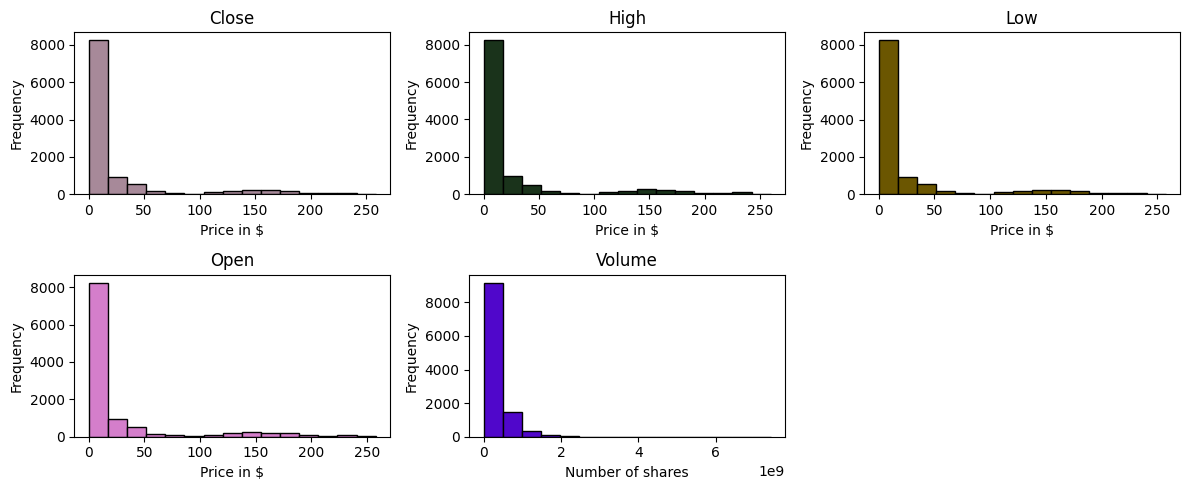

In [7]:
def random_color():
    return (np.random.random(), np.random.random(), np.random.random())

fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = axes.flatten()

for idx, c in enumerate(df.columns):
    df[c].plot(kind='hist', ax=axes[idx], edgecolor="black", bins=15, color=random_color())
    axes[idx].set_title(c)
    if c != "Volume":
        axes[idx].set_xlabel("Price in $")
    else:
        axes[idx].set_xlabel("Number of shares")

axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Box plots

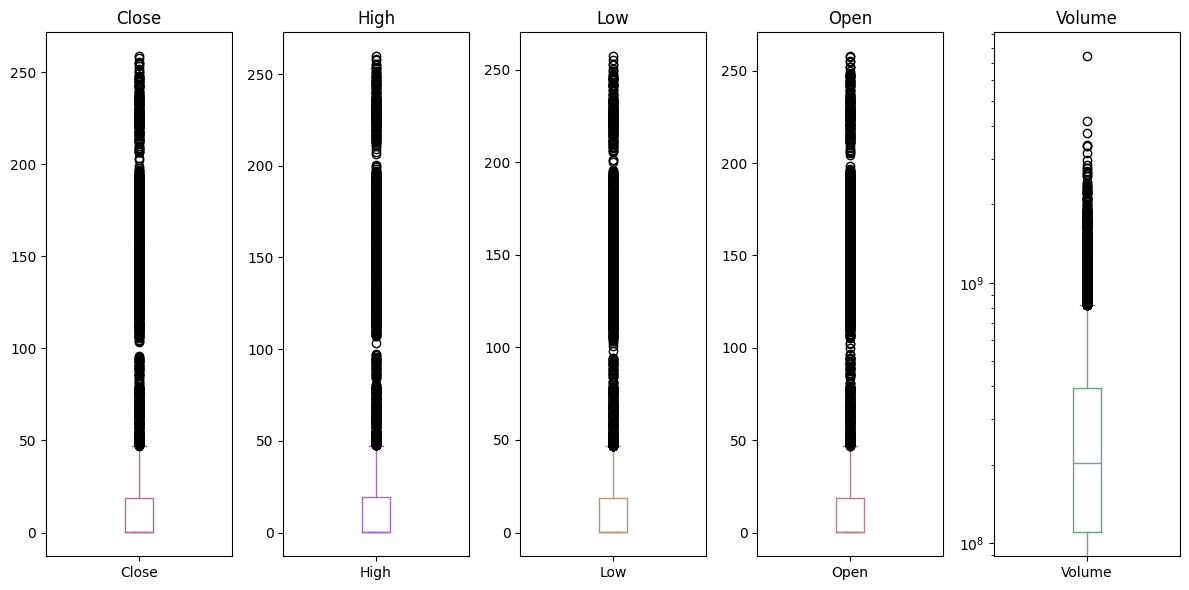

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
axes = axes.flatten()

for idx, c in enumerate(df.columns):
    df[c].plot(kind='box', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)

    if c == "Volume":
        axes[idx].set_yscale('log')  # Uncomment to apply log scale

plt.tight_layout()
plt.show()

# Line charts

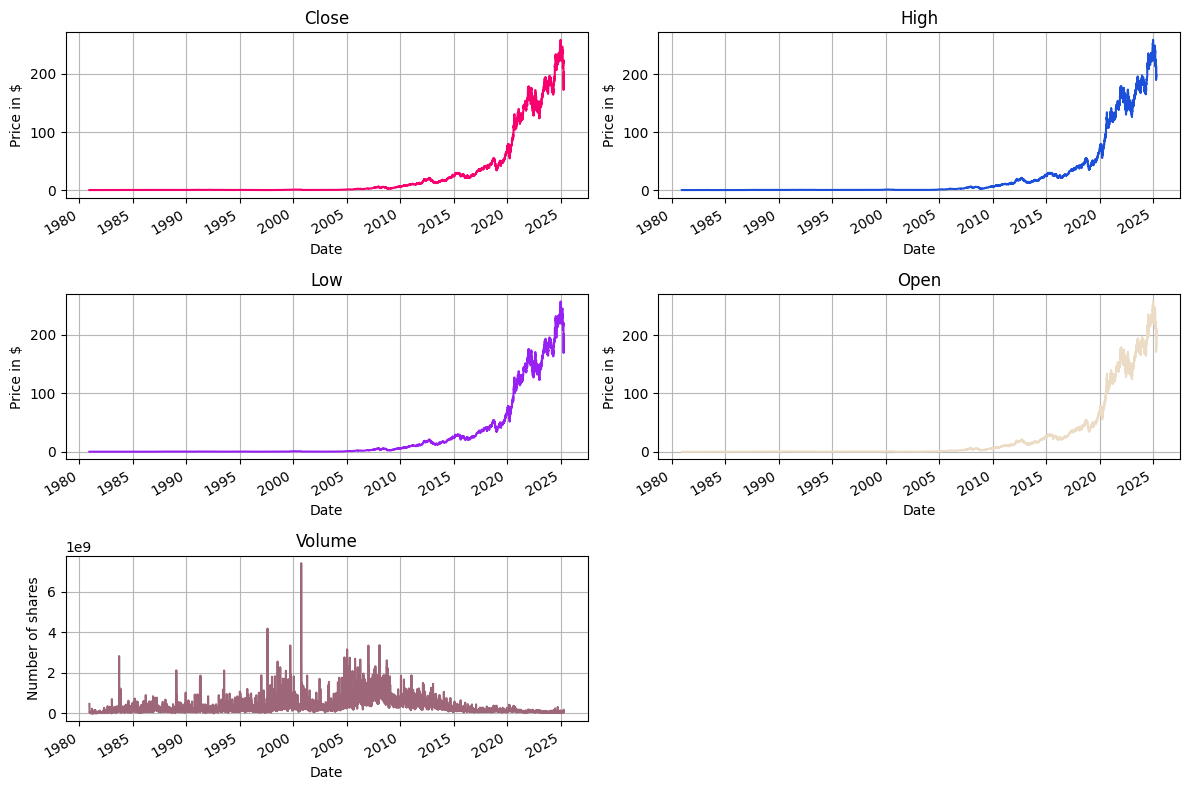

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, c in enumerate(df.columns):
    df[c].plot(kind='line', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)
    axes[idx].grid(True, alpha=0.9)
    if c != "Volume":
        axes[idx].set_ylabel("Price in $")
    else:
        axes[idx].set_ylabel("Number of shares")

axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Candlestick chart

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     increasing_line_color='green', 
                                     decreasing_line_color='red')])

fig.update_layout(
    title=f'AAPL Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)

fig.show()

# Feature engineering

In [11]:
def add_financial_features(df: pd.DataFrame, window: int = 14) -> pd.DataFrame:
    """
    Adds financial features derived from the 5 basic features (Open, Close, Low, High, Volume).

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with financial data.

    window : int, default=14
        Number of past data points used to calculate Simple Moving Average and Average True Range.

    Returns
    -------
    new_df : pd.DataFrame
        Dataframe with added financial features.
    """

    # Add Daily Return
    df["Daily Return"] = (df["Close"] - df["Open"]) / df["Open"]

    # Add Lagged Return
    close_pct_change = df['Close'].pct_change()
    df['Lagged Return'] = close_pct_change.shift(1).fillna(0)

    # Add Log Return
    df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Log Return'] = df['Log Return'].fillna(0)

    # Add Simple Moving Average
    df[f"SMA {window}"] = df["Close"].rolling(window=window).mean().fillna(0)

    # Add Average True Range
    df["Prev_Close"] = df['Close'].shift(1).fillna(0)
    true_range = df[['High', 'Low', 'Prev_Close']].apply(lambda x: max(x["High"] - x["Low"], abs(x["High"] - x["Prev_Close"]), abs(x["Low"] - x["Prev_Close"])), axis=1)
    df[f'ATR {window}'] = true_range.rolling(window=window).mean().fillna(0)
    df.drop(["Prev_Close"], axis=1, inplace=True)

    return df

In [12]:
df = add_financial_features(df)
df.tail()

Price,Close,High,Low,Open,Volume,Daily Return,Lagged Return,Log Return,SMA 14,ATR 14
Date,,,,,,,,,,
2025-04-08,172.419998,190.339996,169.210007,186.699997,120859500,-0.076486,-0.036734,-0.051102,211.056430,9.478572
2025-04-09,198.850006,200.610001,171.889999,171.949997,184395900,0.156441,-0.049818,0.142617,209.967145,11.153572
2025-04-10,190.419998,194.779999,183.000000,189.070007,121880000,0.007140,0.153289,-0.043319,207.977858,11.745716
2025-04-11,198.149994,199.539993,186.059998,186.100006,87435900,0.064750,-0.042394,0.039792,206.365001,12.479287
2025-04-14,202.520004,212.940002,201.160004,211.440002,101203700,-0.042187,0.040594,0.021814,204.848573,13.248573


In [13]:
df.describe()

Price,Close,High,Low,Open,Volume,Daily Return,Lagged Return,Log Return,SMA 14,ATR 14
count,11175.000000,11175.000000,11175.000000,11175.000000,1.117500e+04,11175.000000,11175.000000,11175.000000,11175.000000,11175.000000
mean,24.730523,24.981029,24.455045,24.709665,3.138892e+08,0.000014,0.001074,0.000682,24.615584,0.573603
std,52.026397,52.542529,51.448861,51.970247,3.344444e+08,0.022777,0.027800,0.028212,51.839348,1.266632
min,0.037773,0.038203,0.037773,0.038203,0.000000e+00,-0.243524,-0.518692,-0.731248,0.000000,0.000000
25%,0.244305,0.249432,0.238996,0.244287,1.098044e+08,-0.010992,-0.012605,-0.012685,0.245014,0.009139
50%,0.454226,0.461636,0.447643,0.454414,2.023616e+08,0.000000,0.000000,0.000000,0.456903,0.020891
75%,19.007272,19.111697,18.783560,18.944567,3.941322e+08,0.010726,0.014360,0.014265,18.697274,0.367404
max,258.735504,259.814335,257.347047,257.906429,7.421641e+09,0.192656,0.332280,0.286892,251.875211,13.248573


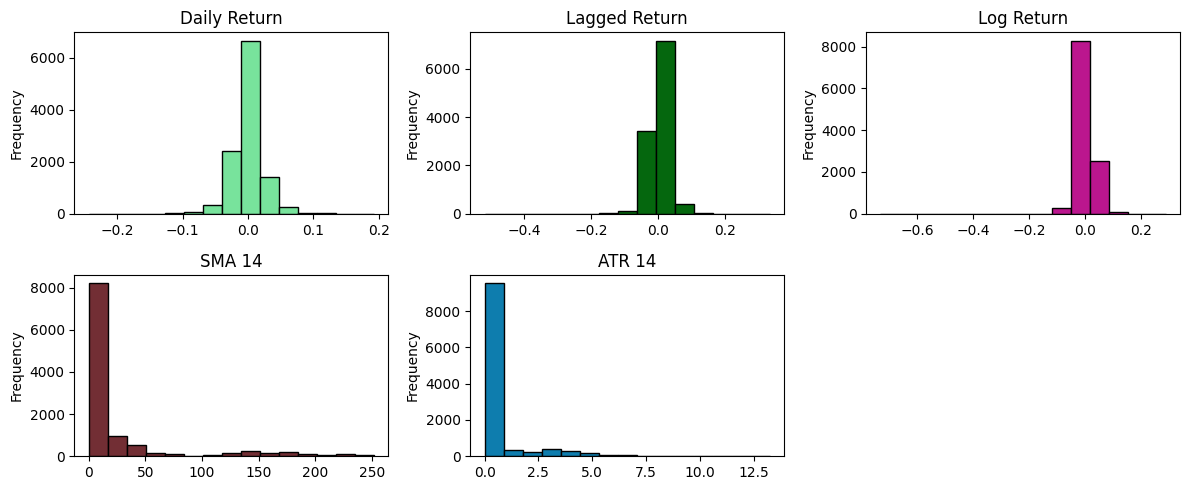

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = axes.flatten()

for idx, c in enumerate(df.columns[5:]):
    df[c].plot(kind='hist', ax=axes[idx], edgecolor="black", bins=15, color=random_color())
    axes[idx].set_title(c)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

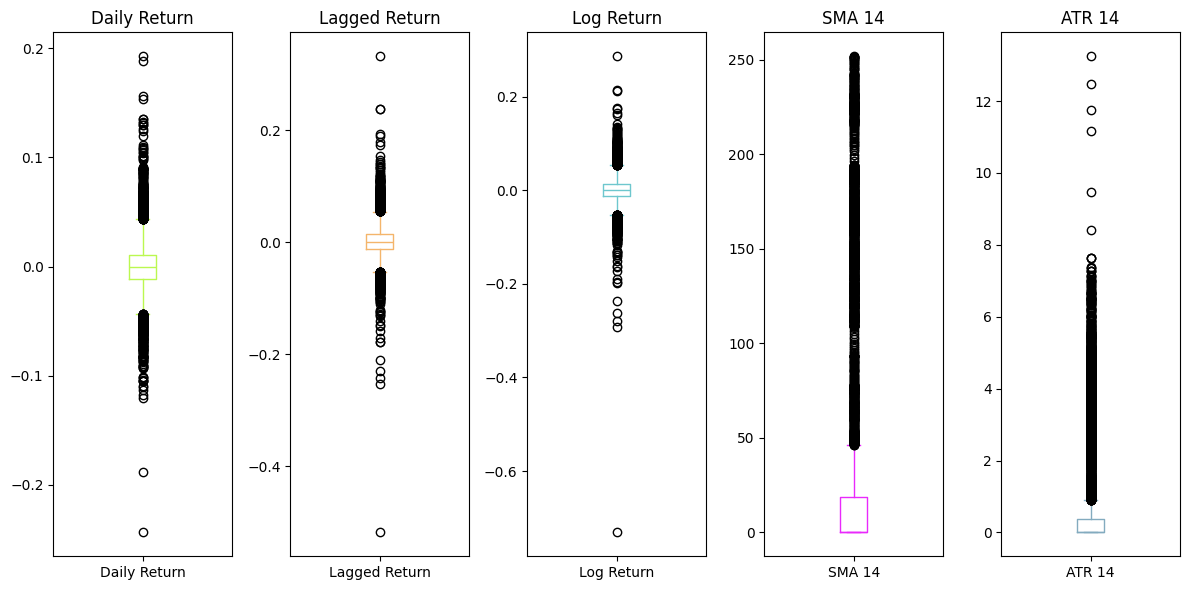

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
axes = axes.flatten()

for idx, c in enumerate(df.columns[5:]):
    df[c].plot(kind='box', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)

plt.tight_layout()
plt.show()

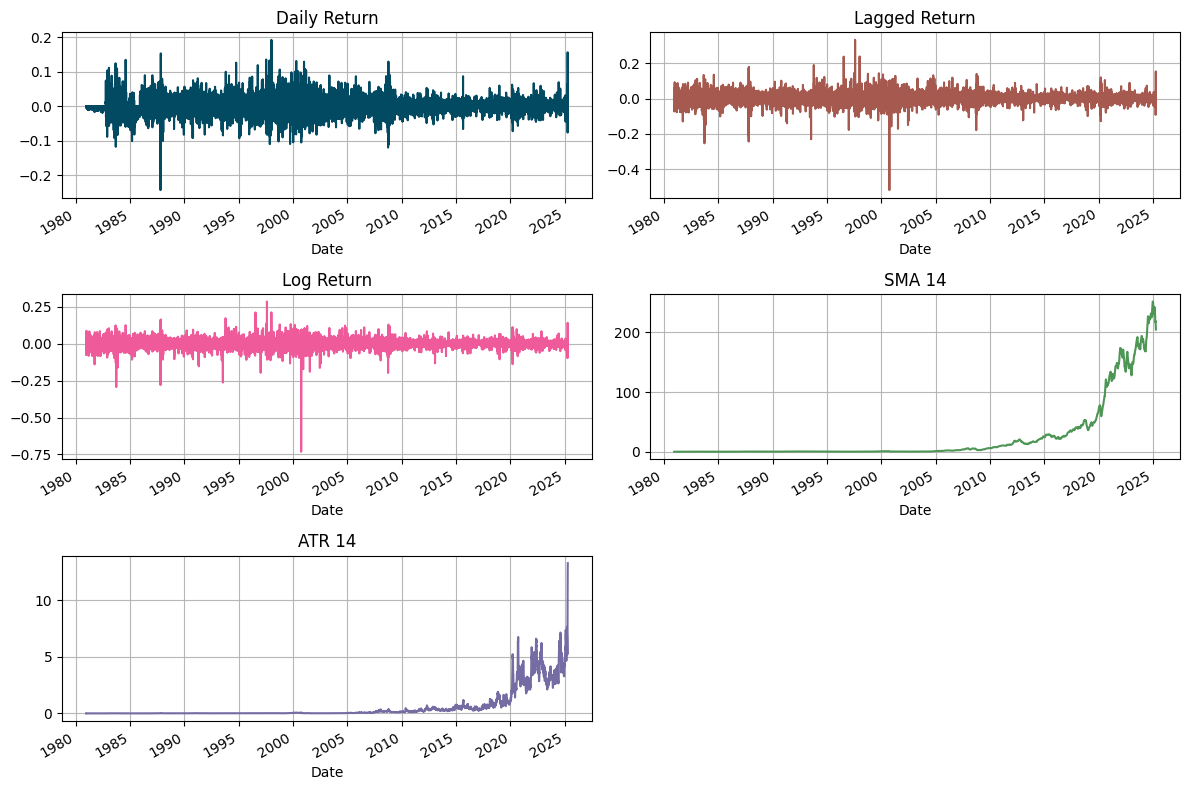

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, c in enumerate(df.columns[5:]):
    df[c].plot(kind='line', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)
    axes[idx].grid(True, alpha=0.9)

axes[-1].axis('off')
plt.tight_layout()
plt.show()